In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Superstore.csv")

In [3]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
dataset[['Profit', 'Sales']].describe()

,Profit,Sales
count,9994.000000,9994.000000
mean,28.656896,229.858001
std,234.260108,623.245101
min,-6599.978000,0.444000
25%,1.728750,17.280000
50%,8.666500,54.490000
75%,29.364000,209.940000
max,8399.976000,22638.480000


In [5]:
# average sales value per order

sales_per_order = dataset.groupby('Order ID')['Sales'].mean()
sales_per_order

Order ID
CA-2014-100006    377.970000
CA-2014-100090    349.596000
CA-2014-100293     91.056000
CA-2014-100328      3.928000
CA-2014-100363     10.688000
                     ...    
US-2017-168802     18.368000
US-2017-169320     85.715000
US-2017-169488     28.430000
US-2017-169502     56.705000
US-2017-169551    224.139667
Name: Sales, Length: 5009, dtype: float64

In [6]:
sales_per_order.mean()

220.91165758314682

In [7]:
# average sales value per state

sales_per_state = dataset.groupby('State')['Sales'].mean()

In [8]:
# sorting the values in descending order

sales_per_state = dataset.groupby('State')['Sales'].mean().sort_values(ascending=False)
sales_per_state

State
Wyoming                 1603.136000
Vermont                  811.760909
Nevada                   428.951333
Rhode Island             404.070643
Montana                  372.623467
Indiana                  359.431946
Missouri                 336.441667
Minnesota                335.541011
Alabama                  319.846557
Virginia                 315.342500
West Virginia            302.456000
Michigan                 299.096525
Oklahoma                 298.233182
Wisconsin                291.951000
District of Columbia     286.502000
Delaware                 285.948635
New York                 275.599531
New Jersey               275.110092
Washington               273.994605
New Hampshire            270.093481
Georgia                  266.825217
Kentucky                 263.250000
Florida                  233.612815
California               228.729451
Maryland                 225.766886
North Carolina           223.305880
Louisiana                219.453095
Massachusetts         

In [9]:
sales_per_state = dataset.groupby('State')['Sales'].sum().sort_values(ascending=False)
sales_per_state

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

* Category Level Analysis

In [10]:
sales_per_category = dataset.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_per_category

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Category'>

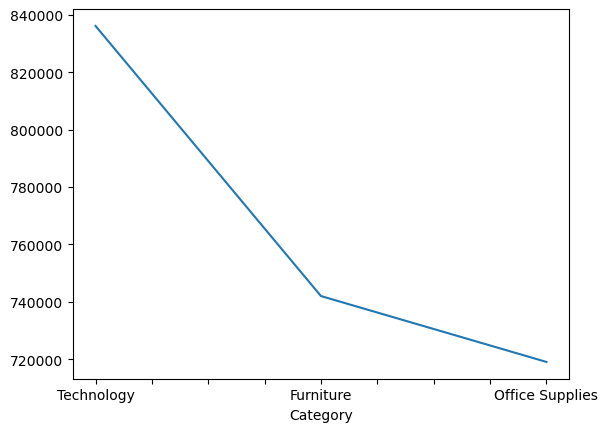

In [11]:
dataset.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot()

In [12]:
import seaborn as sbn

<AxesSubplot:xlabel='Category', ylabel='count'>

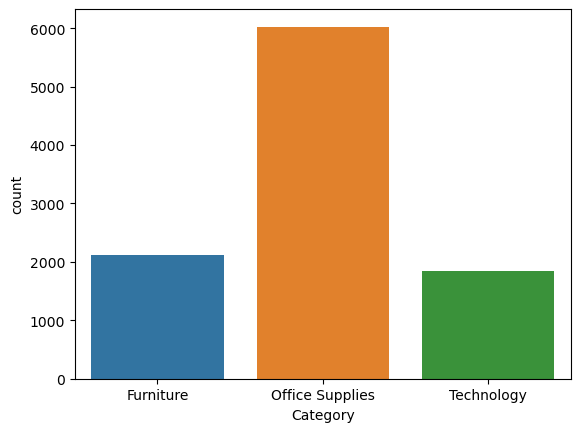

In [13]:
sbn.countplot(x = dataset['Category'])

In [14]:
dataset[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

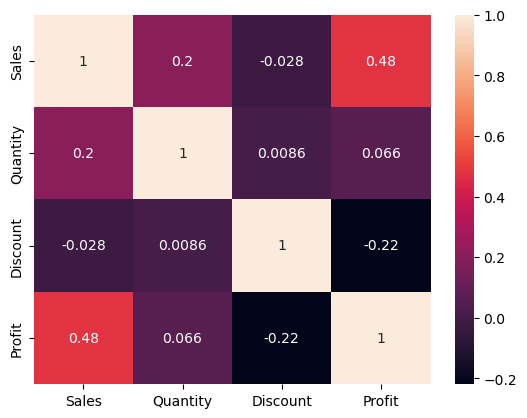

In [15]:
sbn.heatmap(dataset[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

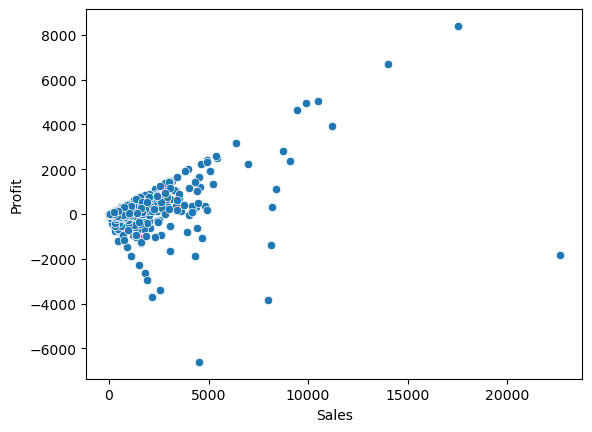

In [16]:
sbn.scatterplot(x = 'Sales', y = 'Profit', data=dataset)

** Using this plot we can see the high value item got sold in loss. (see the point where as far as from all points) because that item profit value is minus value

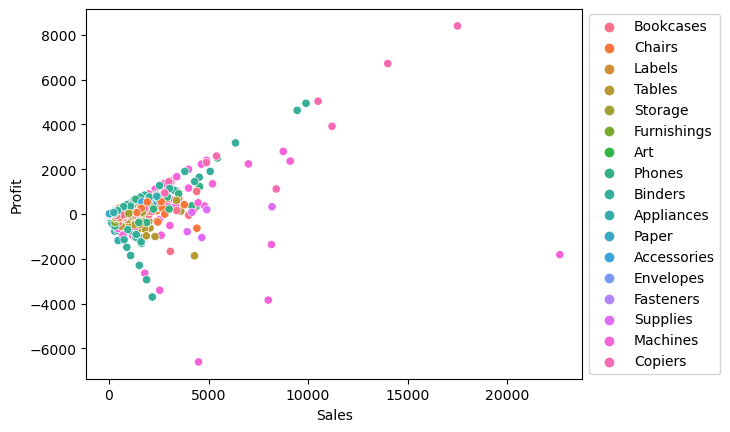

In [17]:
# divide the plot into sub-category to get the more visualization

import matplotlib.pyplot as plt

ax = sbn.scatterplot(x='Sales', y='Profit', data=dataset, hue='Sub-Category')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # changing the position of legend
plt.show()

** To keep the profit high level, we should avoid selling machines and we should promte selling copiers